## Stochastic Hill Climbing

### Diagrama da Solução

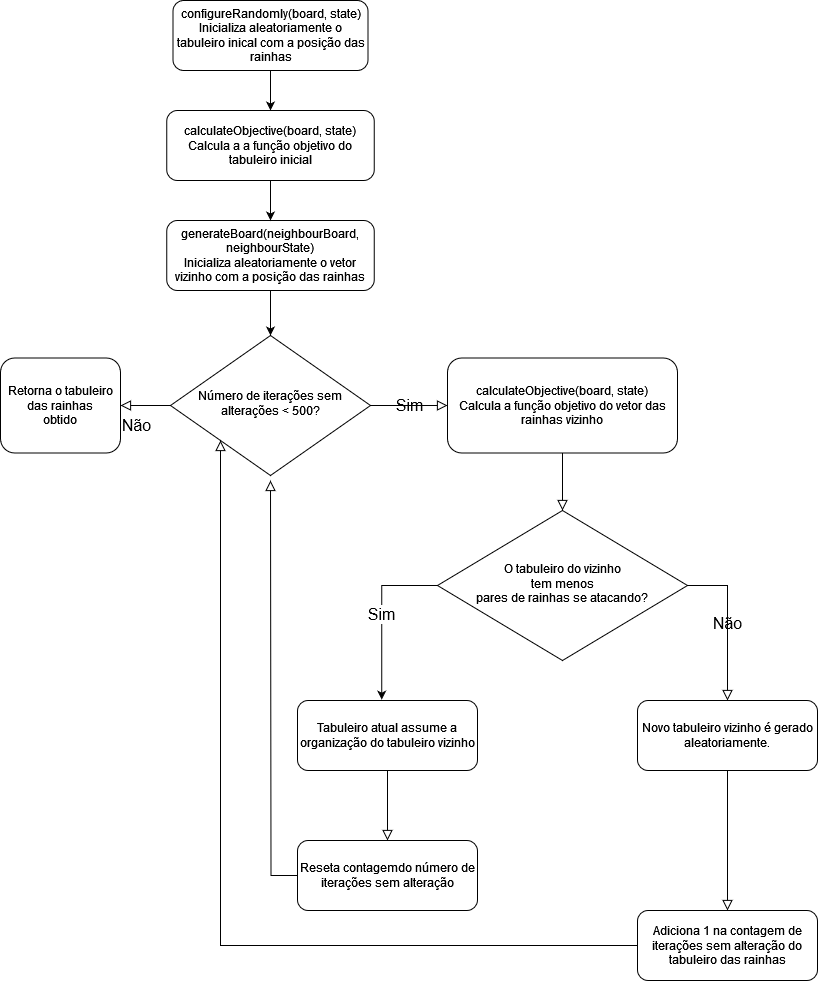

In [4]:
from IPython.display import Image
Image(filename='images\Hill_Climbing_Flow.drawio(1).png') 

Nota: Para permitir reprodutibilidade do experimento apresentado, foi definido uma seed com valor = 10. 

Caso seja de interesse gerar novos resultados, basta alterar ou remover a seed.

    IMPORTANTE: EM CASOS DE ALTERAÇÃO DO CÓDIGO, FAVOR RE-EXECUTAR TODAS AS CÉLULAS ABAIXO DELE. 

In [5]:
# Python3 implementation of the
# above approach
import random
from random import randint
import statistics
import time

N = 8
random.seed(10)
# A utility function that configures
# the 2D array "board" and
# array "state" randomly to provide
# a starting point for the algorithm.
def configureRandomly(board, state):

	# Iterating through the
	# column indices
	for i in range(N):

		# Getting a random row index
		state[i] = randint(0, 100000) % N;

		# Placing a queen on the
		# obtained place in
		# chessboard.
		board[state[i]][i] = 1;
	
# A utility function that prints
# the 2D array "board".
def printBoard(board):
	
	for i in range(N):
		print(*board[i])
	

# A utility function that fills
# the 2D array "board" with
# values "value"
def fill(board, value):
	
	for i in range(N):
		for j in range(N):
			board[i][j] = value;
		
# This function calculates the
# objective value of the
# state(queens attacking each other)
# using the board by the
# following logic.
def calculateObjective( board, state):

	# For each queen in a column, we check
	# for other queens falling in the line
	# of our current queen and if found,
	# any, then we increment the variable
	# attacking count.

	# Number of queens attacking each other,
	# initially zero.
	attacking = 0;

	# Variables to index a particular
	# row and column on board.
	for i in range(N):

		# At each column 'i', the queen is
		# placed at row 'state[i]', by the
		# definition of our state.

		# To the left of same row
		# (row remains constant
		# and col decreases)
		row = state[i]
		col = i - 1;
		while (col >= 0 and board[row][col] != 1) :
			col -= 1
		
		if (col >= 0 and board[row][col] == 1) :
			attacking += 1;
		
		# To the right of same row
		# (row remains constant
		# and col increases)
		row = state[i]
		col = i + 1;
		while (col < N and board[row][col] != 1):
			col += 1;
		
		if (col < N and board[row][col] == 1) :
			attacking += 1;
		
		# Diagonally to the left up
		# (row and col simultaneously
		# decrease)
		row = state[i] - 1
		col = i - 1;
		while (col >= 0 and row >= 0 and board[row][col] != 1) :
			col-= 1;
			row-= 1;
		
		if (col >= 0 and row >= 0 and board[row][col] == 1) :
			attacking+= 1;
		
		# Diagonally to the right down
		# (row and col simultaneously
		# increase)
		row = state[i] + 1
		col = i + 1;
		while (col < N and row < N and board[row][col] != 1) :
			col+= 1;
			row+= 1;
		
		if (col < N and row < N and board[row][col] == 1) :
			attacking += 1;
		
		# Diagonally to the left down
		# (col decreases and row
		# increases)
		row = state[i] + 1
		col = i - 1;
		while (col >= 0 and row < N and board[row][col] != 1) :
			col -= 1;
			row += 1;
		
		if (col >= 0 and row < N and board[row][col] == 1) :
			attacking += 1;
		
		# Diagonally to the right up
		# (col increases and row
		# decreases)
		row = state[i] - 1
		col = i + 1;
		while (col < N and row >= 0 and board[row][col] != 1) :
			col += 1;
			row -= 1;
		
		if (col < N and row >= 0 and board[row][col] == 1) :
			attacking += 1;
		
	# Return pairs.
	return int(attacking / 2);

# A utility function that
# generates a board configuration
# given the state.
def generateBoard( board, state):
	fill(board, 0);
	for i in range(N):
		board[state[i]][i] = 1;
	
# A utility function that copies
# contents of state2 to state1.
def copyState( state1, state2):

	for i in range(N):
		state1[i] = state2[i];


def hillClimbing(board, state):
    number_of_iter = 0
    init_time = time.time()
    neighbourBoard = [[0 for _ in range(N)] for _ in range(N)]
    neighbourState = [0 for _ in range(N)]
    copyState(neighbourState, state)
    generateBoard(neighbourBoard, neighbourState)

    no_improvement_iterations = 0
    max_no_improvement = 500

    current_fitness = calculateObjective(board, state)
    
    while no_improvement_iterations < max_no_improvement:
        generateBoard(board, state)

        #getNeighbour(neighbourBoard, neighbourState)

        neighbour_fitness = calculateObjective(neighbourBoard, neighbourState)
        # Check if neighbour_fitness is better than the current one
        if neighbour_fitness < current_fitness:
            no_improvement_iterations = 0  # Reset the counter, there is a improvement
            current_fitness = neighbour_fitness
            copyState(state, neighbourState)
        else:
            no_improvement_iterations += 1  # No improvement
            neighbourState[randint(0, 100000) % N] = randint(0, 100000) % N
            generateBoard(neighbourBoard, neighbourState)

        # print(no_improvement_iterations)
        # print('current: ', current_fitness, ' neighbour: ', neighbour_fitness)
        # print('Queen array: ', state)
        # printBoard(board)
        number_of_iter += 1
            

    # Parada após atingir o número máximo de iterações sem melhorias
    print("Parada por 500 iterações sem melhorias.")
    print("Numero de ataques: ", current_fitness)
    print('Queen array: ', state)
    printBoard(board)
    finish_time = time.time() - init_time
    return current_fitness, state, number_of_iter, finish_time
		
# Driver code
state = [0] * N
board = [[0 for _ in range(N)] for _ in range(N)]

# Getting a starting point by
# randomly configuring the board
configureRandomly(board, state);
# Do hill climbing on the
# board obtained
board_results = []
queen_arrays = []
list_of_iter = []
list_of_times = []
results_dict = {}

for idx in range(28):
	results_dict[idx] = []

for _ in range(50):
	configureRandomly(board, state)
	fit, state_, number_of_iter, finish_time = hillClimbing(board, state)
	board_results.append(fit)
	queen_arrays.append(state_[:])
	results_dict[fit].append(state_[:])
	list_of_iter.append(number_of_iter)
	list_of_times.append(finish_time)
 
print('Results:', board_results)
print('Queen arrays: ', queen_arrays )
print(f'Number of iterations per solution: {list_of_iter}')
print(f'Time taken per solution: {list_of_times}')
print('Result dict: ', results_dict, '\n')



count = 0
print('Ranking do 5 melhores')
for key, values in results_dict.items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value}')
        count += 1

print('\n')
print(f'Número médio de iterações por solução: {statistics.mean(list_of_iter)}')
print(f'Desvio padrão de iterações por solução: {statistics.stdev(list_of_iter)}')

print('\n')
print(f'Tempo médio de execução por solução em segundos: {statistics.mean(list_of_times)}')
print(f'Desvio padrão de do tempo de execução por solução em segundos: {statistics.stdev(list_of_times)}')

Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [7, 4, 2, 3, 6, 0, 3, 1]
0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 1
0 0 1 0 0 0 0 0
0 0 0 1 0 0 1 0
0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0
1 0 0 0 0 0 0 0
Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [0, 0, 4, 2, 5, 3, 1, 3]
1 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0
0 0 0 1 0 0 0 0
0 0 0 0 0 1 0 1
0 0 1 0 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [6, 3, 7, 2, 2, 5, 2, 0]
0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0
0 0 0 1 1 0 1 0
0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0
1 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0
Parada por 500 iterações sem melhorias.
Numero de ataques:  1
Queen array:  [3, 7, 6, 2, 0, 5, 1, 4]
0 0 0 0 1 0 0 0
0 0 0 0 0 0 1 0
0 0 0 1 0 0 0 0
1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1
0 0 0 0 0 1 0 0
0 0 1 0 0 0 0 0
0 1 0 0 0 0 0 0
Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [7, 1, 3

Ranking dos 5 melhores encontrados pelo algoritmo

In [6]:
count = 0
print('Ranking do 5 melhores')
for key, values in results_dict.items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value}')
        count += 1

Ranking do 5 melhores
Numero de rainhas se atacando:0 | Array da rainha:[2, 6, 1, 7, 5, 3, 0, 4]
Numero de rainhas se atacando:1 | Array da rainha:[3, 7, 6, 2, 0, 5, 1, 4]
Numero de rainhas se atacando:1 | Array da rainha:[4, 2, 0, 6, 3, 7, 5, 1]
Numero de rainhas se atacando:1 | Array da rainha:[3, 6, 4, 7, 1, 3, 5, 2]
Numero de rainhas se atacando:1 | Array da rainha:[3, 5, 2, 5, 1, 4, 7, 0]


Média e Desvio Padrão do número de iterações por solução

In [7]:
print(f'Número médio de iterações por solução: {statistics.mean(list_of_iter)}')
print(f'Desvio padrão de iterações por solução: {statistics.stdev(list_of_iter)}')

Número médio de iterações por solução: 739.64
Desvio padrão de iterações por solução: 173.5195995516686


Média e Desvio Padrão do tempo de execução por solução

In [8]:
print(f'Tempo médio de execução por solução em segundos: {statistics.mean(list_of_times)}')
print(f'Desvio padrão de do tempo de execução por solução em segundos: {statistics.stdev(list_of_times)}')

Tempo médio de execução por solução em segundos: 0.015580000877380372
Desvio padrão de do tempo de execução por solução em segundos: 0.003827464656778031
